<a href="https://colab.research.google.com/github/KusumaatmaSyafadhi/kusumaatmas/blob/main/A_silent_killer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HEART ATTACK PREDICTION
***DATA UNDERSTANDING***

Prediksi terhadap pasien penyakit jantung yang akan diprediksi berdasarkan kategori dari beberapa variabel penunjangnya.

# LOADING LIBRARIES AND DATA SET

In [ ]:
import numpy as np #Mengolah matrix
import pandas as pd #Read structured data
import matplotlib.pyplot as plt #Data plot visualization
import seaborn as sns
 
#Machine Learning
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler  #Feature Scaling
from sklearn.model_selection import train_test_split #Data Partition
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import  RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
 
#ensembling
from sklearn.ensemble import VotingClassifier

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Dataset yang akan saya gunakan yaitu data mengenai pasien yang terkena penyakit jantung berdasarkan beberapa karakteristik yang menyertai yang saya unduh langsung pada Kaggle.

In [ ]:
heart = pd.read_csv('heart.csv',sep=";")

# EXPLORATORY AND VISUAIZATION DATA ANALISYS

In [ ]:
heart.shape

(303, 14)

***DATA DESCRIPTIONS***

Independent Variables (x):
1. age : umur dari pasien

2. sex : (1 = male; 0 = female)

3. cp : Chest pain type / tipe nyeri yang paling parah

4. trestbps : Resting blood pressure / melacak tekanan darah (dalam mm Hg saat masuk ke rumah sakit)

5. chol : (Serum cholesterol) kolestoral dalam mg / dl

6. fbs : Fasting blood sugar / gula darah puasa> 120 mg / dl (1 = benar; 0 = salah)

7. restecg : resting electrocardiographic results / mengembalikan hasil elektrokardiografi (0 = normal)

8. thalach : maximum heart rate achieved / denyut jantung maksimum tercapai

9. exang : exercise induced angina (1 = ya; 0 = tidak)

10. oldpeak : ST depression induced by exercise relative to rest / ST depresi yang disebabkan oleh olahraga relatif terhadap istirahat

11. slope : Slope of peak exercise ST segment / kemiringan segmen ST latihan puncak

12. ca : number of major vessels (0-3) colored by flourosopy / jumlah pembuluh darah utama (0-3) diwarnai dengan fluoroskopi

13. thal : 3 = normal; 6 = cacat tetap; 7 = cacat yang dapat dibalik


Dependent Variable (y):

14. target : diagnosis of heart disease (angiographic disease status) (0= less chance of heart attack 1= more chance of heart attack)

In [ ]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Mengidentifikasi tipe data dan keberadaan nilai yang hilang

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


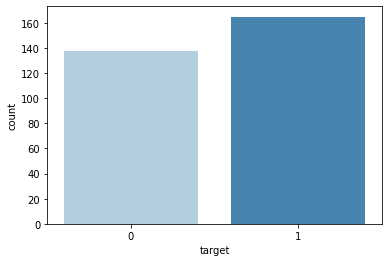

In [ ]:
cols= ["#C2C4E2","#EED4E5"]
sns.countplot(x= heart['target'], palette = 'Blues')

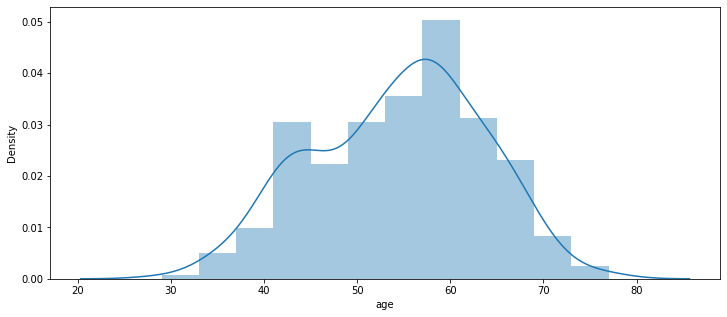

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(12,5))
sns.distplot(heart['age'],hist=True,kde=True,rug=False,label='age',norm_hist=True)

In [ ]:
corr = heart.corr(method = 'pearson')

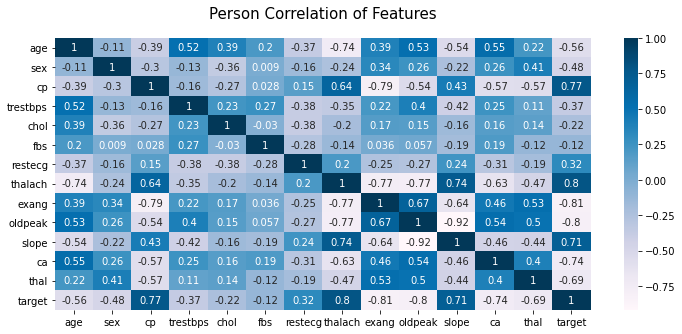

In [ ]:
colormap = plt.cm.PuBu 
plt.figure(figsize=(12,5)) 
plt.title("Person Correlation of Features", y = 1.05, size = 15) 
sns.heatmap(corr.astype(float).corr(), linecolor = "white", cmap = colormap, annot = True)

>Dari tabel korelasi dapat dilihat bahwa age mempunyai hubungan linear positif yang sangat kuat dengan target jika dibandingkan yang lain. Nilai korelasi variabel lain hampir mendekati nol yang menandakan bahwa variable2 tersebut kurang berpengaruh terhadap nilai target.

# DATA PREPARATION

Missing Value Checking

In [ ]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Fill Missing Values

-> Dataset hasn't any missing value.

Langkah selanjutnya adalah memperoleh pengetahuan tentang statistik ringkasan data dasar menggunakan metode .describe(), yang menghitung nilai count, mean, standar deviasi, minimum, maksimum dan persentil (25, 50 dan 75). Ini membantu kita mendeteksi anomali apa pun dalam kumpulan data kita. Seperti variabel dengan varians tinggi atau data yang sangat miring.

In [ ]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Outlier Finding

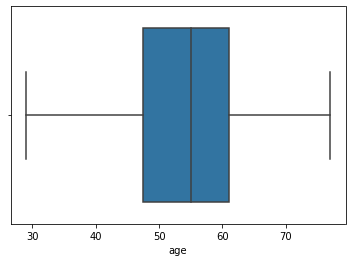

In [ ]:
sns.boxplot(heart["age"])

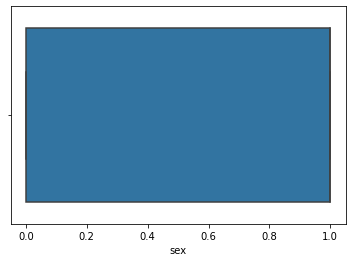

In [ ]:
sns.boxplot(heart["sex"])

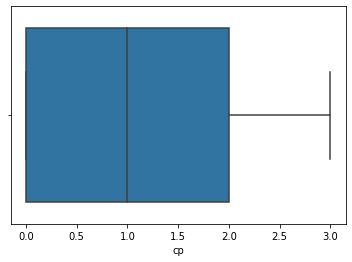

In [ ]:
sns.boxplot(heart["cp"])

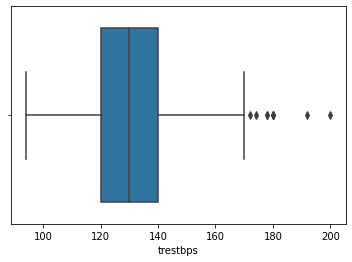

In [ ]:
sns.boxplot(heart["trestbps"])

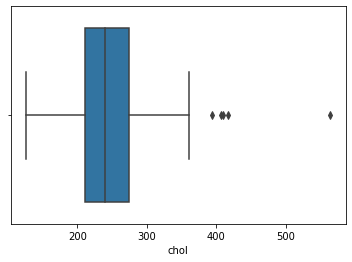

In [ ]:
sns.boxplot(heart["chol"])

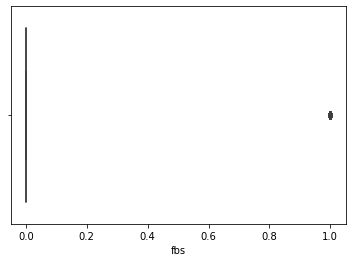

In [ ]:
sns.boxplot(heart["fbs"])

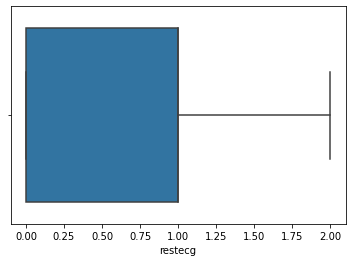

In [ ]:
sns.boxplot(heart["restecg"])

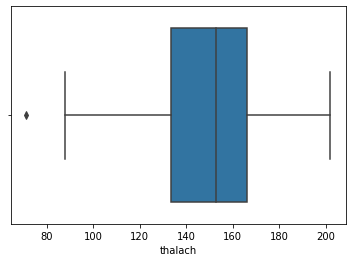

In [ ]:
sns.boxplot(heart["thalach"])

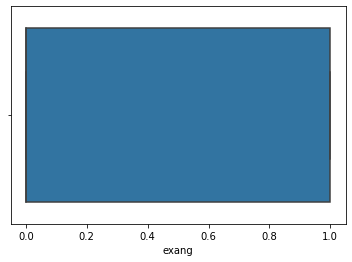

In [ ]:
sns.boxplot(heart["exang"])

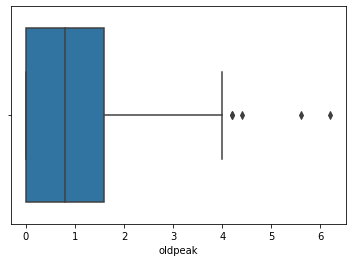

In [ ]:
sns.boxplot(heart["oldpeak"])

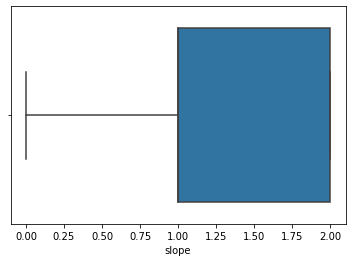

In [ ]:
sns.boxplot(heart["slope"])

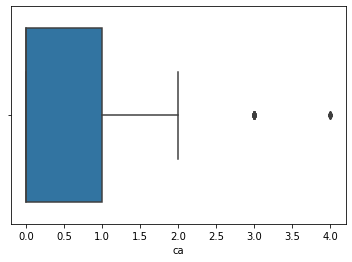

In [ ]:
sns.boxplot(heart["ca"])

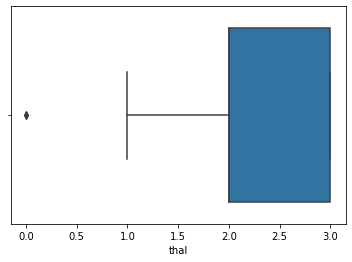

In [ ]:
sns.boxplot(heart["thal"])

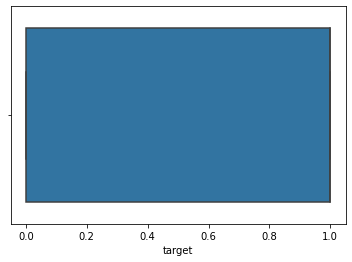

In [ ]:
sns.boxplot(heart["target"])

Outlier Fixing (trestbps, chol, fbs, thalach, oldpeak, ca, thal)

-> trestbps

In [ ]:
#Data 'trestbps' diisi dengan median
fill=heart["trestbps"].median()
heart["trestbps"]=heart["trestbps"].fillna(fill)

In [ ]:
#lihat outlier observasi pada variabel 'trestbps'
Q1 =heart["trestbps"].quantile(0.25)
Q3 =heart["trestbps"].quantile(0.75)    
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
heart.loc[(heart["trestbps"]>upper_range),:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0


In [ ]:
#Ganti outlier observations dengan upper bound dan lower bound
heart.loc[(heart["trestbps"]>upper_range),"trestbps"]=upper_range

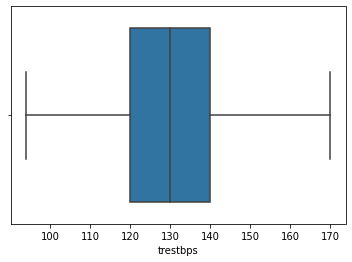

In [ ]:
sns.boxplot(heart["trestbps"])

-> chol

In [ ]:
#Data 'chol' diisi dengan median
fill=heart["chol"].median()
heart["chol"]=heart["chol"].fillna(fill)

In [ ]:
#lihat outlier observasi pada variabel 'chol'
Q1 =heart["chol"].quantile(0.25)
Q3 =heart["chol"].quantile(0.75)    
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
heart.loc[(heart["chol"]>upper_range),:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140.0,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115.0,564,0,0,160,0,1.6,1,0,3,1
96,62,0,0,140.0,394,0,0,157,0,1.2,1,0,2,1
220,63,0,0,150.0,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134.0,409,0,0,150,1,1.9,1,2,3,0


In [ ]:
#Ganti outlier observations dengan upper bound dan lower bound
heart.loc[(heart["chol"]>upper_range),"chol"]=upper_range

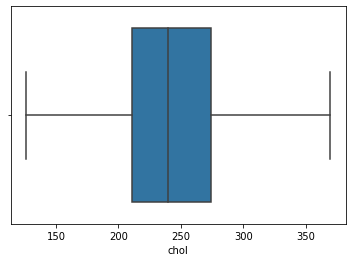

In [ ]:
sns.boxplot(heart["chol"])

-> fbs

In [ ]:
#Data 'fbs' diisi dengan median
fill=heart["fbs"].median()
heart["fbs"]=heart["fbs"].fillna(fill)

In [ ]:
#lihat outlier observasi pada variabel 'fbs'
Q1 =heart["fbs"].quantile(0.25)
Q3 =heart["fbs"].quantile(0.75)    
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
heart.loc[(heart["fbs"]>upper_range),:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.00,1,0,150,0,2.3,0,0,1,1
8,52,1,2,170.0,199.00,1,1,162,0,0.5,2,0,3,1
14,58,0,3,150.0,283.00,1,0,162,0,1.0,2,0,2,1
23,61,1,2,150.0,243.00,1,1,137,1,1.0,1,0,2,1
26,59,1,2,150.0,212.00,1,1,157,0,1.6,2,0,2,1
28,65,0,2,140.0,369.75,1,0,157,0,0.8,2,1,2,1
29,53,1,2,130.0,197.00,1,0,152,0,1.2,0,0,2,1
36,54,0,2,135.0,304.00,1,1,170,0,0.0,2,0,2,1
60,71,0,2,110.0,265.00,1,0,130,0,0.0,2,1,2,1
64,58,1,2,140.0,211.00,1,0,165,0,0.0,2,0,2,1


In [ ]:
#Ganti outlier observations dengan upper bound dan lower bound
heart.loc[(heart["fbs"]>upper_range),"fbs"]=upper_range

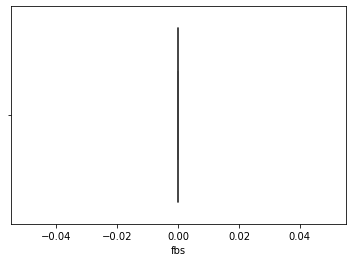

In [ ]:
sns.boxplot(heart["fbs"])

-> thalach

In [ ]:
#Data 'thalach' diisi dengan median
fill=heart["thalach"].median()
heart["thalach"]=heart["thalach"].fillna(fill)

In [ ]:
#lihat outlier observasi pada variabel 'thalach'
Q1 =heart["thalach"].quantile(0.25)
Q3 =heart["thalach"].quantile(0.75)    
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
heart.loc[(heart["thalach"]>upper_range),:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
#Ganti outlier observations dengan upper bound dan lower bound
heart.loc[(heart["thalach"]>upper_range),"thalach"]=upper_range

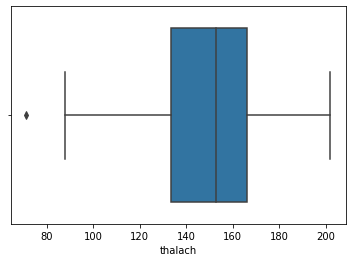

In [ ]:
sns.boxplot(heart["thalach"])

-> oldpeak

In [ ]:
#Data 'oldpeak' diisi dengan median
fill=heart["oldpeak"].median()
heart["oldpeak"]=heart["oldpeak"].fillna(fill)

In [ ]:
#lihat outlier observasi pada variabel 'oldpeak'
Q1 =heart["oldpeak"].quantile(0.25)
Q3 =heart["oldpeak"].quantile(0.75)    
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
heart.loc[(heart["oldpeak"]>upper_range),:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
101,59,1,3,170.0,270.0,0.0,0,145.0,0,4.2,0,0,3,1
204,62,0,0,160.0,164.0,0.0,0,145.0,0,6.2,0,3,3,0
221,55,1,0,140.0,217.0,0.0,1,111.0,1,5.6,0,0,3,0
250,51,1,0,140.0,298.0,0.0,1,122.0,1,4.2,1,3,3,0
291,58,1,0,114.0,318.0,0.0,2,140.0,0,4.4,0,3,1,0


In [ ]:
#Ganti outlier observations dengan upper bound dan lower bound
heart.loc[(heart["oldpeak"]>upper_range),"oldpeak"]=upper_range

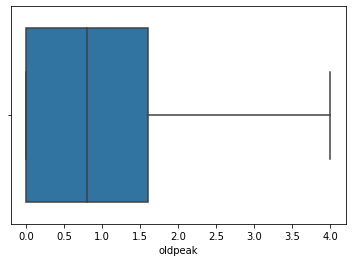

In [ ]:
sns.boxplot(heart["oldpeak"])

-> ca

In [ ]:
#Data 'ca' diisi dengan median
fill=heart["ca"].median()
heart["ca"]=heart["ca"].fillna(fill)

In [ ]:
#lihat outlier observasi pada variabel 'ca'
Q1 =heart["ca"].quantile(0.25)
Q3 =heart["ca"].quantile(0.75)    
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
heart.loc[(heart["ca"]>upper_range),:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
52,62,1,2,130.0,231.00,0.0,1,146.0,0,1.8,1,3,3,1
92,52,1,2,138.0,223.00,0.0,1,169.0,0,0.0,2,4,2,1
97,52,1,0,108.0,233.00,0.0,1,147.0,0,0.1,2,3,3,1
99,53,1,2,130.0,246.00,0.0,0,173.0,0,0.0,2,3,2,1
158,58,1,1,125.0,220.00,0.0,1,144.0,0,0.4,1,4,3,1
163,38,1,2,138.0,175.00,0.0,1,173.0,0,0.0,2,4,2,1
164,38,1,2,138.0,175.00,0.0,1,173.0,0,0.0,2,4,2,1
165,67,1,0,160.0,286.00,0.0,0,108.0,1,1.5,1,3,2,0
181,65,0,0,150.0,225.00,0.0,0,114.0,0,1.0,1,3,3,0
191,58,1,0,128.0,216.00,0.0,0,131.0,1,2.2,1,3,3,0


In [ ]:
#Ganti outlier observations dengan upper bound dan lower bound
heart.loc[(heart["ca"]>upper_range),"ca"]=upper_range

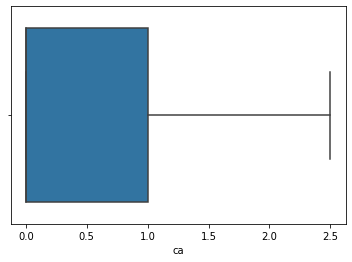

In [ ]:
sns.boxplot(heart["ca"])

-> thal

In [ ]:
#Data 'thal' diisi dengan median
fill=heart["thal"].median()
heart["thal"]=heart["thal"].fillna(fill)

In [ ]:
#lihat outlier observasi pada variabel 'thal'
Q1 =heart["thal"].quantile(0.25)
Q3 =heart["thal"].quantile(0.75)    
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
heart.loc[(heart["thal"]>upper_range),:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
#Ganti outlier observations dengan upper bound dan lower bound
heart.loc[(heart["thal"]>upper_range),"thal"]=upper_range

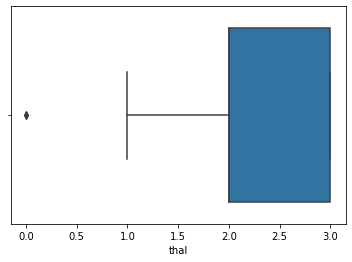

In [ ]:
sns.boxplot(heart["thal"])

Finding Duplicate Data

In [ ]:
heart.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

>Sebelum menerapkan algoritma kita harus memeriksa apakah data dibagi rata atau tidak, karena jika data tidak dibagi rata akan menyebabkan masalah ketidakseimbangan data

Train and Test Split

Seluruh kumpulan data umumnya dibagi menjadi 80% train dan 20% kumpulan data uji (aturan umum). Data latih 80% digunakan untuk pelatihan model, sedangkan 20% sisanya digunakan untuk memeriksa bagaimana model digeneralisasikan pada kumpulan data yang tidak terlihat.

In [ ]:
X= ['sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']
y = heart["target"]
X = heart.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [ ]:
X

In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

Normalization / Feature Scaling

Membuat tiap fitur memiliki nilai rata-rata 0 dan variansi 1.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#https://www.megabagus.id/feature-scaling/

# MODEL FITTING

Di sini saya mengambil Algoritma Machine Learning yang berbeda dan mencoba menemukan algoritma yang memprediksi secara akurat.

>1. Logistic Regression
2. Naive Bayes
3. Random Forest Classifier
4. K-Nearest Neighbour
5. Decision Tree
6. Support Vector Machine

In [ ]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[21  6]
 [ 4 30]]


Accuracy of Logistic Regression: 83.60655737704919 

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [ ]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[21  6]
 [ 3 31]]


Accuracy of Naive Bayes model: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [ ]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[22  5]
 [ 3 31]]


Accuracy of Random Forest: 86.88524590163934 

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



In [ ]:
m4 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[20  7]
 [ 4 30]]


Accuracy of K-NeighborsClassifier: 81.9672131147541 

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        27
           1       0.81      0.88      0.85        34

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



In [ ]:
m5 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[22  5]
 [ 6 28]]


Accuracy of DecisionTreeClassifier: 81.9672131147541 

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        27
           1       0.85      0.82      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [ ]:
m6 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[21  6]
 [ 2 32]]


Accuracy of Support Vector Classifier: 86.88524590163934 

              precision    recall  f1-score   support

           0       0.91      0.78      0.84        27
           1       0.84      0.94      0.89        34

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61



saya pingin bikin grafik / semacamnya buat nampilin variabel mana saja yang pengaruhnya paling besar terhadap serangan jantung
ini saya sebelumnya cb import library yang buat xgb tapi gatau knp gagal dan saya hapus, baru nemu cara satu ini doang blm nemu yang lain buat bikin grafiknya.
>MOHON BANTUANNYA YA TUAN KUSUMA YANG BAIK HATI, DERMAWAN, DAN TIDAK SUKA MENGELUH :)

In [ ]:
 
from xgboost import XGBClassifier
from xgboost import plot_importance

In [ ]:
model = XGBClassifier()
masuk = model.fit(X,y)
print(masuk.feature_importances_)

[0.04732699 0.05594436 0.20020193 0.0296226  0.0343951  0.
 0.03859868 0.03687837 0.10620647 0.07458396 0.0609768  0.11384583
 0.20141889]


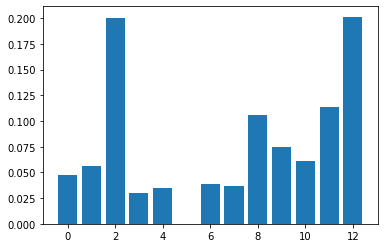

In [ ]:
 plt.bar(range(len(masuk.feature_importances_)), masuk.feature_importances_)
plt.show()

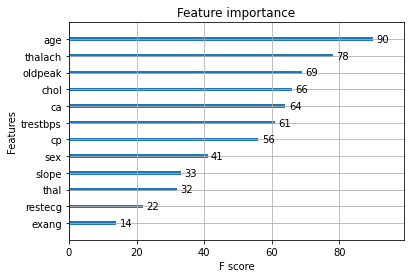

In [ ]:
plot_importance(masuk)
plt.show()

# MODEL EVALUATION

In [ ]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,83.606557
1,Naive Bayes,85.245902
2,Random Forest,86.885246
3,K-Nearest Neighbour,81.967213
4,Decision Tree,81.967213
5,Support Vector Machine,86.885246


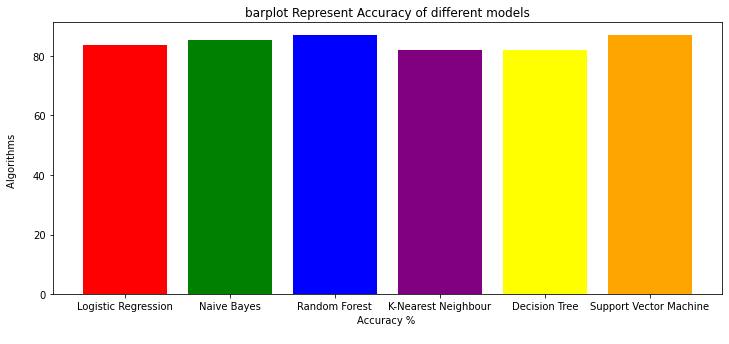

In [ ]:
colors = ['red','green','blue','purple','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy % \n")
plt.ylabel("Algorithms \n")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

Max Voting

# ENSEMBLING
>In order to increase the accuracy of the model we use ensembling. Here I use Max Voting technique (BASIC).

Metode max voting umumnya digunakan untuk masalah klasifikasi. Dalam teknik ini, beberapa model digunakan untuk membuat prediksi untuk setiap titik data. Prediksi oleh masing-masing model dianggap sebagai 'suara'. Prediksi yang didapatkan dari sebagian besar model digunakan sebagai prediksi akhir.

In [ ]:
m1 = LogisticRegression()
m2 = GaussianNB()
m3 = RandomForestClassifier()
m4 = KNeighborsClassifier()
m5 = DecisionTreeClassifier()
m6 = SVC()

model = VotingClassifier(estimators=[('lr', m1), ('nb', m2), ('rf', m3), ('knn', m4), ('dt', m5), ('svc', m6)], voting='hard')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8524590163934426

# CONCLUSION

1. Serangkaian model yang beragam cenderung membuat keputusan yang lebih baik dibandingkan dengan dengan model tunggal.
2. The major symptoms of heart attack?